##<code>AUTORES</code>
- Bruno Rafael Carvalho Coelho
- Gustavo Mendes Queiroz

O versionamento do código pode ser encontrado no repositório:
[Aqui!](https://github.com/brunucoelho/Jornada-Data_analytics/blob/main/Python/data_analytics_projects/Projeto_MineracaodeDados.ipynb)

#PROJETO
## 1. <b>Introdução </b>

O Programa Universidade Para Todos (Prouni) oferta bolsas de estudo, integrais e parciais (50% do valor da mensalidade do curso), em cursos de graduação e sequenciais de formação específica, em instituições de educação superior privadas. O público-alvo do programa é o estudante sem diploma de nível superior. [(MEC, 2023)](https://acessounico.mec.gov.br/prouni)

O candidato pré-selecionado deve comprovar renda familiar bruta mensal, por pessoa, de até 1,5 salário mínimo, para obter a bolsa integral, que cobre a totalidade do valor da mensalidade do curso. Já para a bolsa parcial, que cobre (50%) do valor da mensalidade, a renda mensal per capita exigida é de até 3 salários mínimos.

## 2. <b>Jusfiticativa</b>
Sendo assim, o projeto tem como motivação analisar os dados e ver se o programa atende as necessidades dos estudantes brasileiro com maior vunerabilidade economica. Considerando as variavéis de raça, gênero e posição social.

## 3. <b>Objetivo</b>
Mostrar através dos dados oferecidos pelo governo que o objetivo do programa cumpre o papel a qual foi criado. Nos anos de 2015 a 2020


##Dados Carregados

Os arquivos analisados podem ser encontados nesse [link](https://dados.gov.br/dados/conjuntos-dados/mec-prouni).
Os dados são publicos e de fácil acesso.

Contudo, além de forncer a origem dos dados, achamos interessante exportar os dados a uma pasta do Google Drive. E carregar de lá. Importamos a biblioteca <code>pandas</code>. Para trabalhar com os arquivos, sendo que eles se encontram no formado .cvs

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Os arquivos são separados por ano. De 2015 a 2020. Precisamentos concantenar as informações para que a manipulação seja eficas.

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Dados - mineração de dados/pda-prouni-2015.csv', sep=';', encoding = 'ISO-8859-1')
df2 = pd.read_csv('/content/drive/MyDrive/Dados - mineração de dados/pda-prouni-2016.csv', sep=';', encoding = 'ISO-8859-1')
df3 = pd.read_csv('/content/drive/MyDrive/Dados - mineração de dados/pda-prouni-2017.csv', sep=';', encoding = 'ISO-8859-1')
df4 = pd.read_csv('/content/drive/MyDrive/Dados - mineração de dados/pda-prouni-2018.csv', sep=';', encoding = 'ISO-8859-1')
df5 = pd.read_csv('/content/drive/MyDrive/Dados - mineração de dados/pda-prouni-2019.csv', sep=';', encoding = 'ISO-8859-1')
df6 = pd.read_csv('/content/drive/MyDrive/Dados - mineração de dados/pda-prouni-2020.csv', sep=';', encoding = 'ISO-8859-1')

Antes de concaternar as informação, precisamos ver se o numero de colunas, o formato e as ordens das informações estão corretas.

###1.NUMERO DE COLUNAS

In [4]:
list_df = [df1, df2, df3, df4, df5, df6]
for dataframe in list_df:
  print(dataframe.shape)

(252650, 15)
(239262, 15)
(236636, 15)
(241032, 15)
(241032, 15)
(166830, 17)


O ultimo dataframe possui 2 colunas a mais em relação as outras. Vemos quais são essas colunas e excluimos

In [5]:
list_df0 = [df1, df2, df3, df4, df5, df6]
for i, df in enumerate(list_df0, start=1):
    print(f"Colunas do DataFrame {i}:")
    print(df.columns)
    print("\n")

Colunas do DataFrame 1:
Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA', 'NOME_CURSO_BOLSA',
       'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO_BOLSA',
       'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA',
       'DT_NASCIMENTO_BENEFICIARIO', 'BENEFICIARIO_DEFICIENTE_FISICO',
       'REGIAO_BENEFICIARIO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA',
       'MUNICIPIO_BENEFICIARIO_BOLSA'],
      dtype='object')


Colunas do DataFrame 2:
Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA', 'NOME_CURSO_BOLSA',
       'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO_BOLSA',
       'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA',
       'DT_NASCIMENTO_BENEFICIARIO', 'BENEFICIARIO_DEFICIENTE_FISICO',
       'REGIAO_BENEFICIARIO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA',
       'MUNICIPIO_BENEFICIARIO_BOLSA'],
      dtype='object')


Colunas do DataFrame 3:
In

Analisando os prints, vemos qe o DataFrame 6 possui as columas <code>[MUNICIPIO] e [CAMPUS]</code> a mais que as outras. Sendo assim, droparemos elas.

In [6]:
df6 = df6.drop(['MUNICIPIO', 'CAMPUS'], axis=1)

Verificamos novamente o numero de colunas

In [7]:
list_df = [df1, df2, df3, df4, df5, df6]
for dataframe in list_df:
  print(dataframe.shape)


(252650, 15)
(239262, 15)
(236636, 15)
(241032, 15)
(241032, 15)
(166830, 15)


Terminamos o 1º tratamento. que foi colocar o numero de colunas iguais para cada DataFrame

###2.NOME DAS COLUNAS

O nome das colunas devem ser iguais para que haja a concatenação.

In [8]:
list_df2 = [df1, df2, df3, df4, df5, df6]
for i, df in enumerate(list_df2, start=1):
    print(f"Tipos de dados do DataFrame {i}:")
    print(df.dtypes)
    print("\n")

Tipos de dados do DataFrame 1:
ANO_CONCESSAO_BOLSA                int64
CODIGO_EMEC_IES_BOLSA              int64
NOME_IES_BOLSA                    object
TIPO_BOLSA                        object
MODALIDADE_ENSINO_BOLSA           object
NOME_CURSO_BOLSA                  object
NOME_TURNO_CURSO_BOLSA            object
CPF_BENEFICIARIO_BOLSA            object
SEXO_BENEFICIARIO_BOLSA           object
RACA_BENEFICIARIO_BOLSA           object
DT_NASCIMENTO_BENEFICIARIO        object
BENEFICIARIO_DEFICIENTE_FISICO    object
REGIAO_BENEFICIARIO_BOLSA         object
SIGLA_UF_BENEFICIARIO_BOLSA       object
MUNICIPIO_BENEFICIARIO_BOLSA      object
dtype: object


Tipos de dados do DataFrame 2:
ANO_CONCESSAO_BOLSA                int64
CODIGO_EMEC_IES_BOLSA              int64
NOME_IES_BOLSA                    object
TIPO_BOLSA                        object
MODALIDADE_ENSINO_BOLSA           object
NOME_CURSO_BOLSA                  object
NOME_TURNO_CURSO_BOLSA            object
CPF_BENEFICIARIO_BOL

Observando o <code>for</code> feito nos dataframes, temos o nome da primeira coluna do df3, df4 e df5 possui o caneçalho diferente. Assim, precisamos modifica-los. Além disso, o df6 possui varias colunas com o cabeçalho diferente. Vamos muda-los, também.

In [9]:
df3.rename(columns={'ï»¿ANO_CONCESSAO_BOLSA': 'ANO_CONCESSAO_BOLSA'}, inplace=True)
df4.rename(columns={'ï»¿ANO_CONCESSAO_BOLSA': 'ANO_CONCESSAO_BOLSA'}, inplace=True)
df5.rename(columns={'ï»¿ANO_CONCESSAO_BOLSA': 'ANO_CONCESSAO_BOLSA'}, inplace=True)

O parâmetro <code>inplace=True</code> modifica o DataFrame original. Agora mudamos o nome das colunas do df6. Nesse dataframe há várias colunas com o nome divergente.



In [10]:
colunas_nome = ['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA',
'NOME_IES_BOLSA',
'TIPO_BOLSA',
'MODALIDADE_ENSINO_BOLSA',
'NOME_CURSO_BOLSA',
'NOME_TURNO_CURSO_BOLSA',
'CPF_BENEFICIARIO_BOLSA',
'SEXO_BENEFICIARIO_BOLSA',
'RACA_BENEFICIARIO_BOLSA',
'DT_NASCIMENTO_BENEFICIARIO',
'BENEFICIARIO_DEFICIENTE_FISICO',
'REGIAO_BENEFICIARIO_BOLSA',
'SIGLA_UF_BENEFICIARIO_BOLSA',
'MUNICIPIO_BENEFICIARIO_BOLSA']

Rodamos novamente o <code>for</code> para conferir se as colunas foram renomeadas.

In [11]:
df6.columns = colunas_nome

In [12]:
list_df3 = [df1, df2, df3, df4, df5, df6]
for i, df in enumerate(list_df3, start=1):
    print(f"Tipos de dados do DataFrame {i}:")
    print(df.dtypes)
    print("\n")

Tipos de dados do DataFrame 1:
ANO_CONCESSAO_BOLSA                int64
CODIGO_EMEC_IES_BOLSA              int64
NOME_IES_BOLSA                    object
TIPO_BOLSA                        object
MODALIDADE_ENSINO_BOLSA           object
NOME_CURSO_BOLSA                  object
NOME_TURNO_CURSO_BOLSA            object
CPF_BENEFICIARIO_BOLSA            object
SEXO_BENEFICIARIO_BOLSA           object
RACA_BENEFICIARIO_BOLSA           object
DT_NASCIMENTO_BENEFICIARIO        object
BENEFICIARIO_DEFICIENTE_FISICO    object
REGIAO_BENEFICIARIO_BOLSA         object
SIGLA_UF_BENEFICIARIO_BOLSA       object
MUNICIPIO_BENEFICIARIO_BOLSA      object
dtype: object


Tipos de dados do DataFrame 2:
ANO_CONCESSAO_BOLSA                int64
CODIGO_EMEC_IES_BOLSA              int64
NOME_IES_BOLSA                    object
TIPO_BOLSA                        object
MODALIDADE_ENSINO_BOLSA           object
NOME_CURSO_BOLSA                  object
NOME_TURNO_CURSO_BOLSA            object
CPF_BENEFICIARIO_BOL

In [13]:
df_final = pd.concat(list_df3, ignore_index=True)
print(df_final.shape)

(1377442, 15)


###3.FORMATO DA COLUNA


In [14]:
df_final.dtypes

ANO_CONCESSAO_BOLSA               float64
CODIGO_EMEC_IES_BOLSA             float64
NOME_IES_BOLSA                     object
TIPO_BOLSA                         object
MODALIDADE_ENSINO_BOLSA            object
NOME_CURSO_BOLSA                   object
NOME_TURNO_CURSO_BOLSA             object
CPF_BENEFICIARIO_BOLSA             object
SEXO_BENEFICIARIO_BOLSA            object
RACA_BENEFICIARIO_BOLSA            object
DT_NASCIMENTO_BENEFICIARIO         object
BENEFICIARIO_DEFICIENTE_FISICO     object
REGIAO_BENEFICIARIO_BOLSA          object
SIGLA_UF_BENEFICIARIO_BOLSA        object
MUNICIPIO_BENEFICIARIO_BOLSA       object
dtype: object

O formato das colunas <code>'[ANO_CONCESSAO_BOLSA]' e '[CODIGO_EMEC_IES_BOLSA]' </code> está em <code>float</code>, precisamos mudar para <code> int64</code>. Além disso, a Coluna '[DT_NASCIMENTO_BENEFICIARIO]' está em <code>object</code> em todos os dataframes, precisamos converter para <code>Date</code>

In [15]:
df_final['ANO_CONCESSAO_BOLSA'] = df_final['ANO_CONCESSAO_BOLSA'].astype('Int64', errors='ignore')
df_final['CODIGO_EMEC_IES_BOLSA'] = df_final['CODIGO_EMEC_IES_BOLSA'].astype('Int64', errors='ignore')
df_final['DT_NASCIMENTO_BENEFICIARIO'] = df_final['DT_NASCIMENTO_BENEFICIARIO'].astype('datetime64[ns]')

<ipython-input-15-8843f0d2202d>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_final['DT_NASCIMENTO_BENEFICIARIO'] = df_final['DT_NASCIMENTO_BENEFICIARIO'].astype('datetime64[ns]')


Todos as manipulações de ELT foram feitas, assim a concatenação dos 5 DataFrames foram feito. Assim podemos manipular as informações para alcançar o objetivo do projeto.

## Análise exploratória dos dados

Com o pré-tratamento do DataFrame e a pré-limpeza no conjunto de dados é sempre interessante conferir como estão dos dados:

In [16]:
df_prouni = df_final

In [ ]:
# @title
print(df_prouni.isnull().sum())
print(df_prouni.info())

Vemos que há alguns valores nulos. Essas manipulações faremos posteriormente. Outra observação é que devemos importar agora as bibliotecas para a manipulação de gráficos. Como o <code>matplotlib, seaborn e numpy</code>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###Padronização dos dados



Por ter juntados dataframes diferentes, mesmo fazendo o tratamento no numero de colunas, nome e formato. Precisamos padronizar as informações. Pois pode ter valores que representam a mesma categoria mas estão descritos de forma diferente.
Ex: Sexo >> Feminino ou F

In [18]:
colunas_unicas = ['ANO_CONCESSAO_BOLSA',
'TIPO_BOLSA',
'MODALIDADE_ENSINO_BOLSA',
'NOME_CURSO_BOLSA',
'NOME_TURNO_CURSO_BOLSA',
'SEXO_BENEFICIARIO_BOLSA',
'RACA_BENEFICIARIO_BOLSA',
'BENEFICIARIO_DEFICIENTE_FISICO',
'REGIAO_BENEFICIARIO_BOLSA',
'SIGLA_UF_BENEFICIARIO_BOLSA']

Aplicamos um <code>for</code> para ver os valores unicos das colunas especificadas na lista <code>colunas_unicas</code>.

In [19]:
for coluna in colunas_unicas:
    valores_unicos = df_prouni[coluna].unique()
    print(f"Valores únicos na coluna '{coluna}':")
    print(valores_unicos)
    print()

Valores únicos na coluna 'ANO_CONCESSAO_BOLSA':
<IntegerArray>
[2015, 2016, 2017, 2018, 2019, <NA>, 2020]
Length: 7, dtype: Int64

Valores únicos na coluna 'TIPO_BOLSA':
['BOLSA INTEGRAL' 'BOLSA PARCIAL 50%' nan 'INTEGRAL' 'PARCIAL']

Valores únicos na coluna 'MODALIDADE_ENSINO_BOLSA':
['PRESENCIAL' 'EDUCAÇÃO A DISTÂNCIA' 'Presencial' 'EAD' nan]

Valores únicos na coluna 'NOME_CURSO_BOLSA':
['Administração' 'Ciências Contábeis' 'Ciências Biológicas' ...
 'ENGENHARIA AGRÍCOLA E AMBIENTAL' 'MARKETING E PUBLICIDADE'
 'COMPUTAÇÃO GRÁFICA']

Valores únicos na coluna 'NOME_TURNO_CURSO_BOLSA':
['Noturno' 'Integral' 'Matutino' 'Curso a distância' 'Vespertino'
 'Curso a distÃ¢ncia' nan 'CURSO A DISTÂNCIA' 'NOTURNO' 'MATUTINO'
 'VESPERTINO' 'INTEGRAL']

Valores únicos na coluna 'SEXO_BENEFICIARIO_BOLSA':
['Feminino' 'Masculino' 'F' 'M' nan]

Valores únicos na coluna 'RACA_BENEFICIARIO_BOLSA':
['Branca' 'Parda' 'Preta' 'Amarela' 'Indígena' 'Não Informada'
 'IndÃ\xadgena' 'NÃ£o Informada' nan 'Ind

Observamos que as colunas <code>['TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA', 'NOME_TURNO_CURSO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO', 'REGIAO_BENEFICIARIO_BOLSA']</code> possuem dados que representam a mesma categoria, porém os daos estão digitados de forma diferente.

A colana <code>'NOME_CURSO_BOLSA'</code> possui inumeros valores. Converter todos os caracteres para <code>lowercase</code>.:





In [20]:
mapeamento_tipodebolsa = {'BOLSA PARCIAL 50%': 'BOLSA PARCIAL', 'INTEGRAL': 'BOLSA INTEGRAL', 'PARCIAL': 'BOLSA PARCIAL'}
df_prouni['TIPO_BOLSA'] = df_prouni['TIPO_BOLSA'].replace(mapeamento_tipodebolsa)
print(df_prouni['TIPO_BOLSA'].unique()) # Exibindo o DataFrame após a substituição

mapeamento_modalidade = {'PRESENCIAL': 'Presencial', 'EDUCAÇÃO A DISTÂNCIA': 'EAD'}
df_prouni['MODALIDADE_ENSINO_BOLSA'] = df_prouni['MODALIDADE_ENSINO_BOLSA'].replace(mapeamento_modalidade)
print(df_prouni['MODALIDADE_ENSINO_BOLSA'].unique()) # Exibindo o DataFrame após a substituição

df_prouni['NOME_TURNO_CURSO_BOLSA'] = df_prouni['NOME_TURNO_CURSO_BOLSA'].str.lower() #tornando todos os dados em minúsculo
mapeamento_turno = {'curso a distã¢ncia': 'curso a distância'}
df_prouni['NOME_TURNO_CURSO_BOLSA'] = df_prouni['NOME_TURNO_CURSO_BOLSA'].replace(mapeamento_turno)
print(df_prouni['NOME_TURNO_CURSO_BOLSA'].unique()) # Exibindo o DataFrame após a substituição

mapeamento_sexo = {'Feminino' : 'F', 'Masculino': 'M'}
df_prouni['SEXO_BENEFICIARIO_BOLSA'] = df_prouni['SEXO_BENEFICIARIO_BOLSA'].replace(mapeamento_sexo)
print(df_prouni['SEXO_BENEFICIARIO_BOLSA'].unique())

df_prouni['RACA_BENEFICIARIO_BOLSA'] = df_prouni['RACA_BENEFICIARIO_BOLSA'].str.lower() #tornando todos os dados em minúsculo
mapeamento_raca = {'indã\xadgena': 'indígena', 'ind¡gena': 'indígena', 'nã£o informada' : 'não informada'}
df_prouni['RACA_BENEFICIARIO_BOLSA'] = df_prouni['RACA_BENEFICIARIO_BOLSA'].replace(mapeamento_raca)
print(df_prouni['RACA_BENEFICIARIO_BOLSA'].unique()) # Exibindo o DataFrame após a substituição

mapeamento_pcd = {'N' :'NÃO' , 'S': 'SIM'}
df_prouni['BENEFICIARIO_DEFICIENTE_FISICO'] = df_prouni['BENEFICIARIO_DEFICIENTE_FISICO'].replace(mapeamento_pcd)
print(df_prouni['BENEFICIARIO_DEFICIENTE_FISICO'].unique()) # Exibindo o DataFrame após a substituição

df_prouni['REGIAO_BENEFICIARIO_BOLSA'] = df_prouni['REGIAO_BENEFICIARIO_BOLSA'].str.lower()
print(df_prouni['REGIAO_BENEFICIARIO_BOLSA'].unique()) # Exibindo o DataFrame após a substituição

['BOLSA INTEGRAL' 'BOLSA PARCIAL' nan]
['Presencial' 'EAD' nan]
['noturno' 'integral' 'matutino' 'curso a distância' 'vespertino' nan]
['F' 'M' nan]
['branca' 'parda' 'preta' 'amarela' 'indígena' 'não informada' nan]
['NÃO' 'SIM' nan]
['sul' 'nordeste' 'sudeste' 'centro-oeste' 'norte' nan]


In [82]:
mapeamento_curso = {'administraã§ã£o' :'administração', 'ciãªncias contã¡beis' : 'ciências contábeis', 'educaã§ao fã­sica': 'educação física', 'educaã§ã£o fã­sica': 'educação física', 'gestã£o de recursos humanos' :'gestão de recursos humanos', 'engenharia de produã§ã£o' : 'engenharia de produção', 'serviã§o social': 'serviço social', 'nutriã§ã£o': 'nutrição', 'farmã¡cia': 'farmárcia', 'engenharia elã©trica': 'engenharia elétrica'}
df_prouni['NOME_CURSO_BOLSA'] = df_prouni['NOME_CURSO_BOLSA'].str.lower().replace(mapeamento_curso)
print(df_prouni['NOME_CURSO_BOLSA'].unique())

['administração' 'ciências contábeis' 'ciências biológicas' ...
 'gestão em vigilãncia em saúde' 'marketing e publicidade'
 'computação gráfica']


In [ ]:
min_aparecimentos = 5000
#pd.set_option('display.max_rows', None)
contagem_cursos = df_prouni['NOME_CURSO_BOLSA'].value_counts()
cursos_mais_de_20k = contagem_cursos[contagem_cursos > min_aparecimentos]
print(cursos_mais_de_20k)

In [86]:
df_2020 = df[df['ANO_CONCESSAO_BOLSA'] == 2020]

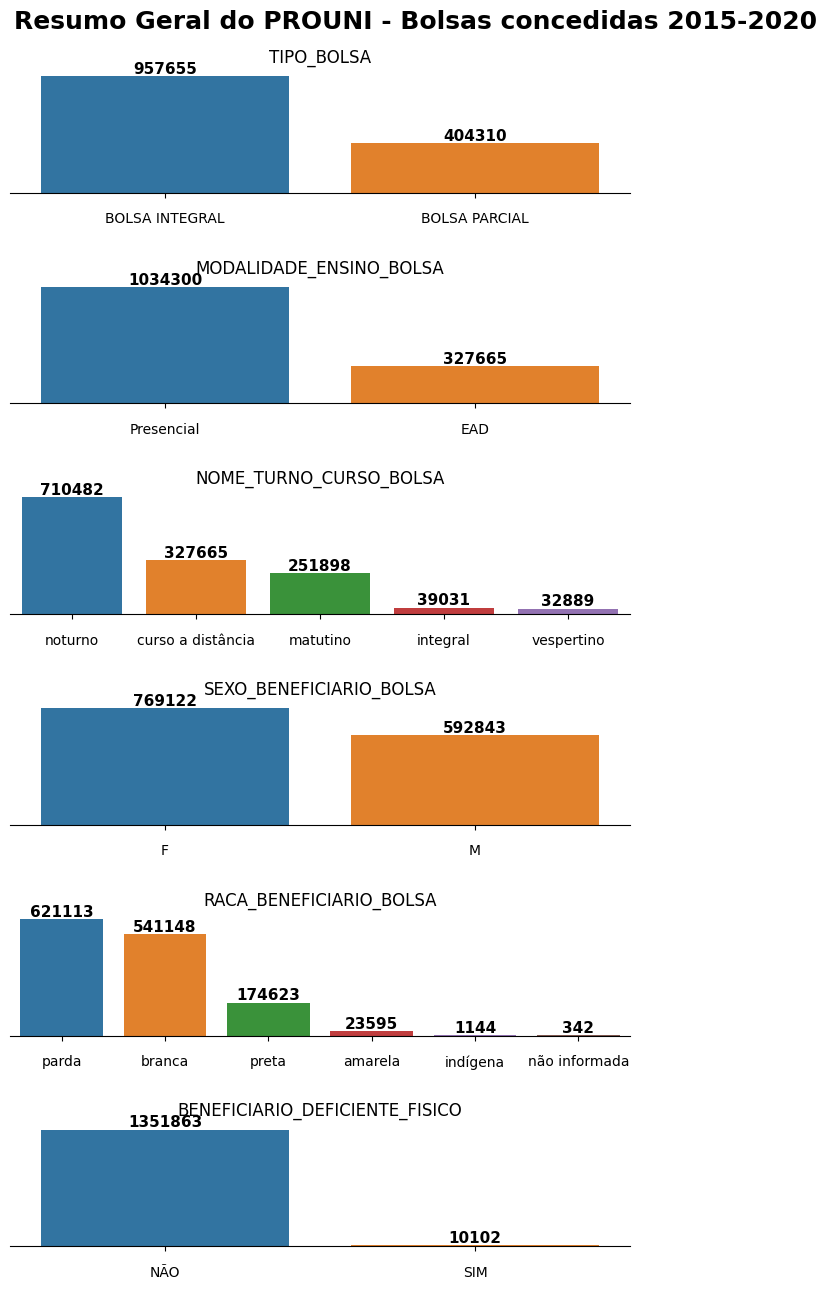

In [87]:
cols = ['TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA',
        'NOME_TURNO_CURSO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA',
        'RACA_BENEFICIARIO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO']

fig, axs = plt.subplots(6, 1, figsize=(8, 14))
fig.subplots_adjust(hspace=0.72, wspace=0.92, top=0.92, bottom=0.08)
axs = axs.ravel()

for i in range(len(cols)):
    series_inter = df_prouni[cols[i]].value_counts()
    sns.barplot(ax=axs[i], x=series_inter.index, y=series_inter)

    # Adiciona os valores no topo das colunas
    for index, value in enumerate(series_inter):
        axs[i].text(index, value + 0.25, str(value), ha='center', va='bottom', fontweight='bold', fontsize=11)

    axs[i].set_title(cols[i])

        # Remove os valores do eixo Y
    axs[i].set(yticklabels=[], ylabel=None)

    # Remove os ticks do eixo Y
    axs[i].tick_params(axis='y', which='both', left=False)


        # Remove as caixas delimitadoras
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)

        # Centraliza os eixos X
    axs[i].tick_params(axis='x', pad=10)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), ha='center')

fig.text(0.13, 0.95, 'Resumo Geral do PROUNI - Bolsas concedidas 2015-2020',
         fontsize=18, fontweight='bold')
plt.show()

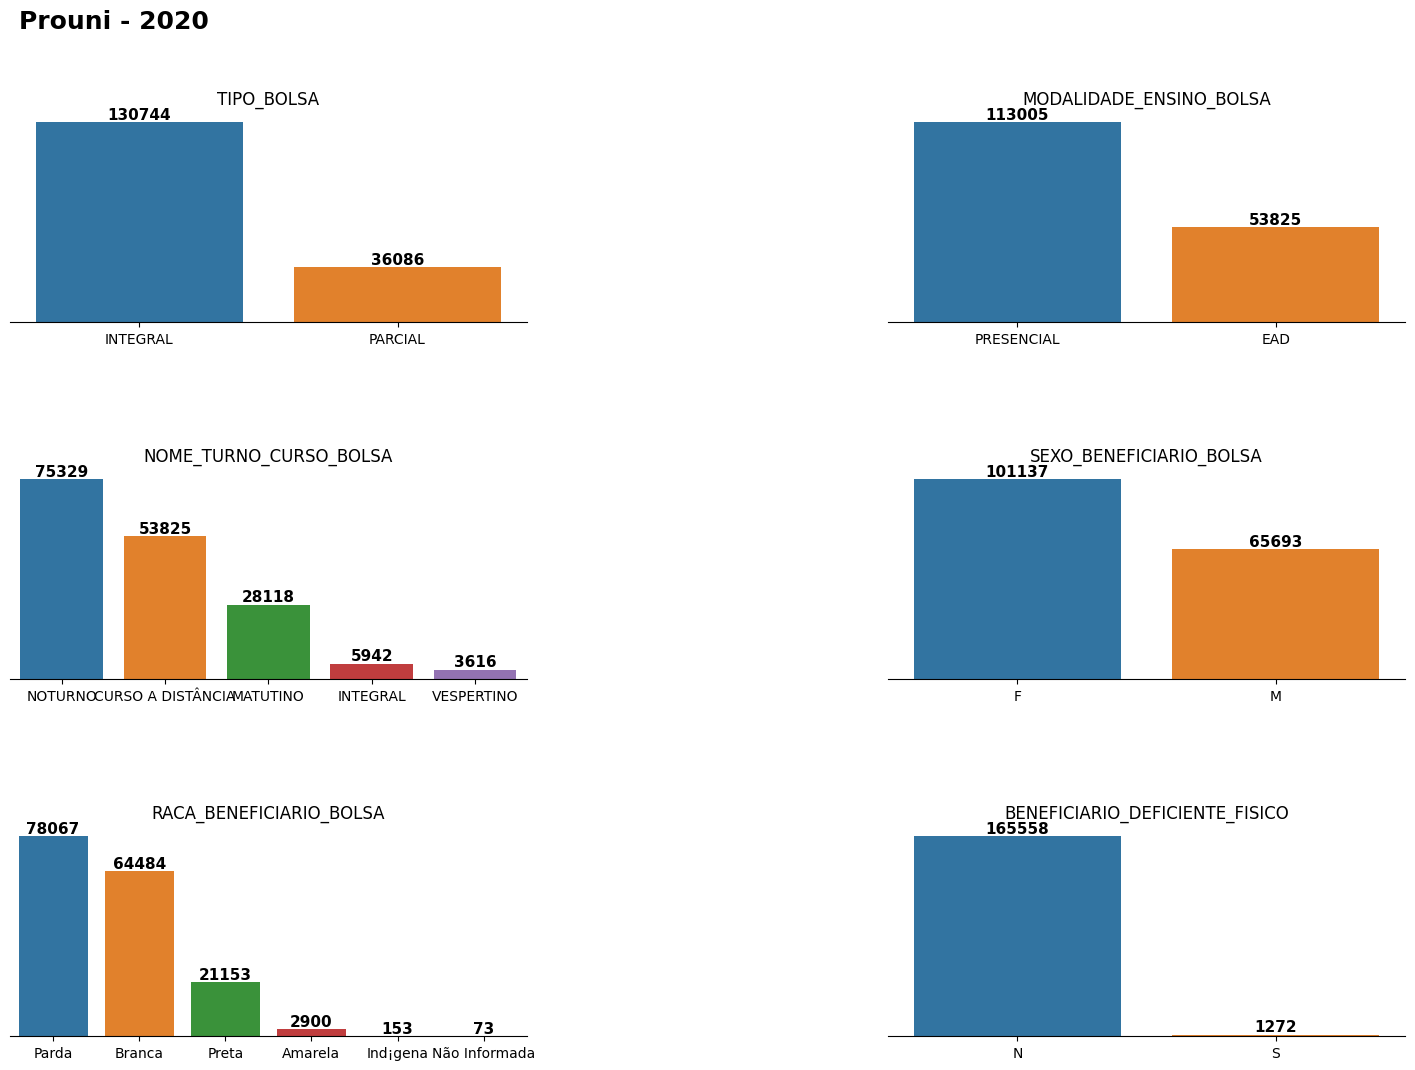

In [88]:
 cols = ['TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA',
        'NOME_TURNO_CURSO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA',
        'RACA_BENEFICIARIO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO']

fig, axs = plt.subplots(3, 2, figsize=(18, 12))#, sharey=True)
fig.subplots_adjust(hspace = .7, wspace=.7)
axs = axs.ravel()

for i in range(len(cols)):
    series_inter = df_2020[cols[i]].value_counts()
    sns.barplot(ax=axs[i], x=series_inter.index, y=series_inter)


    # Adiciona os valores no topo das colunas
    for index, value in enumerate(series_inter):
        axs[i].text(index, value + 0.25, str(value), ha='center', va='bottom', fontweight='bold', fontsize=11)

    axs[i].set_title(cols[i])

        # Remove os valores do eixo Y
    axs[i].set(yticklabels=[], ylabel=None)

    # Remove os ticks do eixo Y
    axs[i].tick_params(axis='y', which='both', left=False)


        # Remove as caixas delimitadoras
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)


fig.text(0.13, 0.95, 'Prouni - 2020',
         fontsize=18, fontweight='bold')
plt.show()

Para uma boa análise compararei os dados gerais (2005-2020) com o ano mais recente (2020)

### Comparação geral e ano atual
É interessante notar como alguns recursos mudaram:
* TIPO_BOLSA: o tipo de bolsas hoje em dia são apenas integrais ou parciais (50%) as parciais (25%) não existem mais
* NOME_TURNO_CURSO_BOLSA: houve um aumento de aulas sendo ministradas ‘à distância’ (e isso foi antes da pandemia)
* SEXO_BENEFICIARIO: a proporção entre homem e mulher vem aumentando a favor da mulher
* RACA_BENEFICIARIO_BOLSA: pessoas autodeclaradas 'pardas brasileiras' aumentaram e agora são mais frequentes do que autodeclaradas brancas

### Universidades (IES) mais populares
Por ser o programa do PROUNI, as universidades listadas são as particulares.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


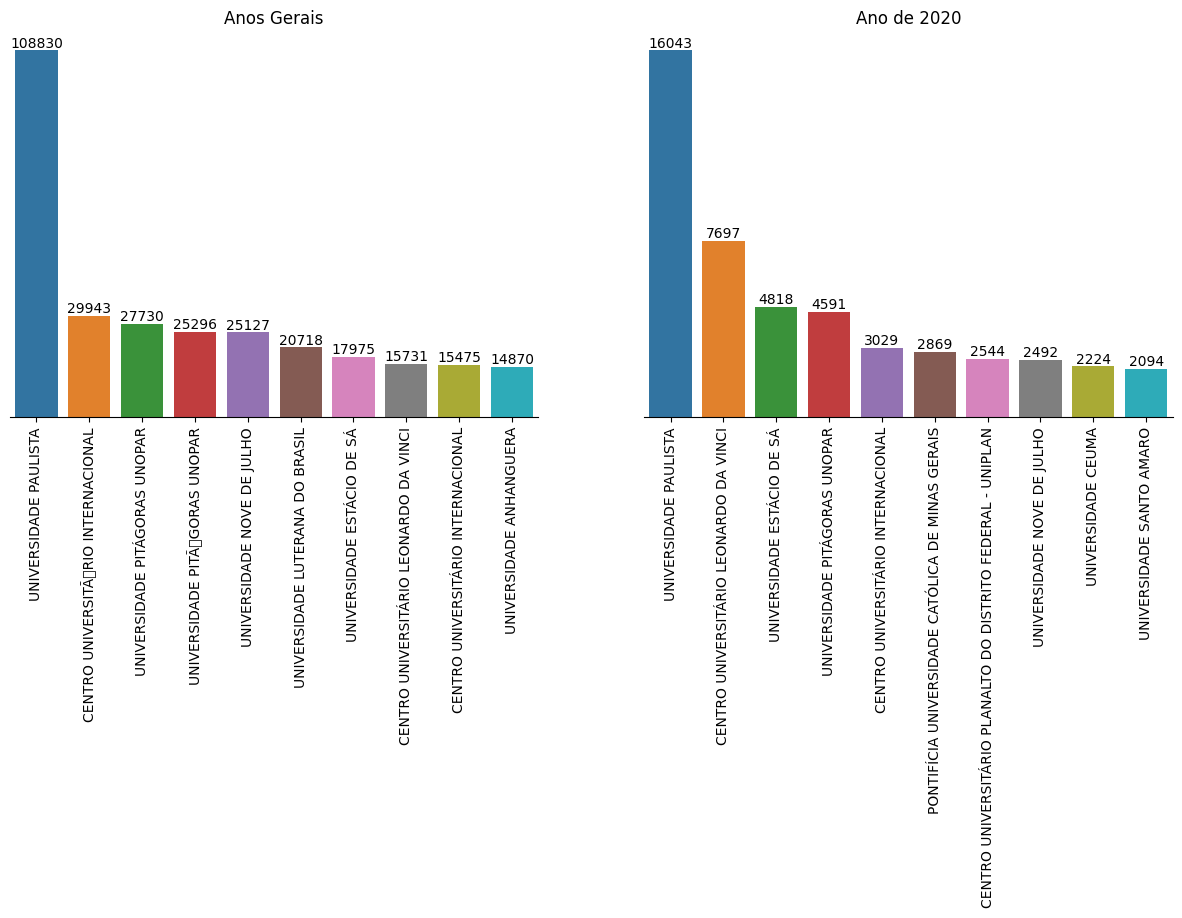

In [89]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

inst_top_10 = df_prouni['NOME_IES_BOLSA'].value_counts()[:10]
sns.barplot(ax=axs[0], x=inst_top_10.index, y=inst_top_10)
# Adiciona os valores no topo das colunas
for index, value in enumerate(inst_top_10):
    axs[0].text(index, value + 0.1, str(value), ha='center', va='bottom')
axs[0].set_xticklabels(inst_top_10.index, rotation=90)
        # Remove os valores do eixo Y
axs[0].set(yticklabels=[], ylabel=None)
    # Remove os ticks do eixo Y
axs[0].tick_params(axis='y', which='both', left=False)
        # Remove as caixas delimitadoras
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].set_title('Anos Gerais')

inst_top_10_2020 = df_2020['NOME_IES_BOLSA'].value_counts()[:10]
sns.barplot(ax=axs[1], x=inst_top_10_2020.index, y=inst_top_10_2020)
# Adiciona os valores no topo das colunas
for index2, value2 in enumerate(inst_top_10_2020):
    axs[1].text(index2, value2 + 0.1, str(value2), ha='center', va='bottom')
axs[1].set_xticklabels(inst_top_10_2020.index, rotation=90)
        # Remove os valores do eixo Y
axs[1].set(yticklabels=[], ylabel=None)
    # Remove os ticks do eixo Y
axs[1].tick_params(axis='y', which='both', left=False)
        # Remove as caixas delimitadoras
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_title('Anos Gerais')
axs[1].set_title('Ano de 2020')
plt.show()

### Cursos mais populares

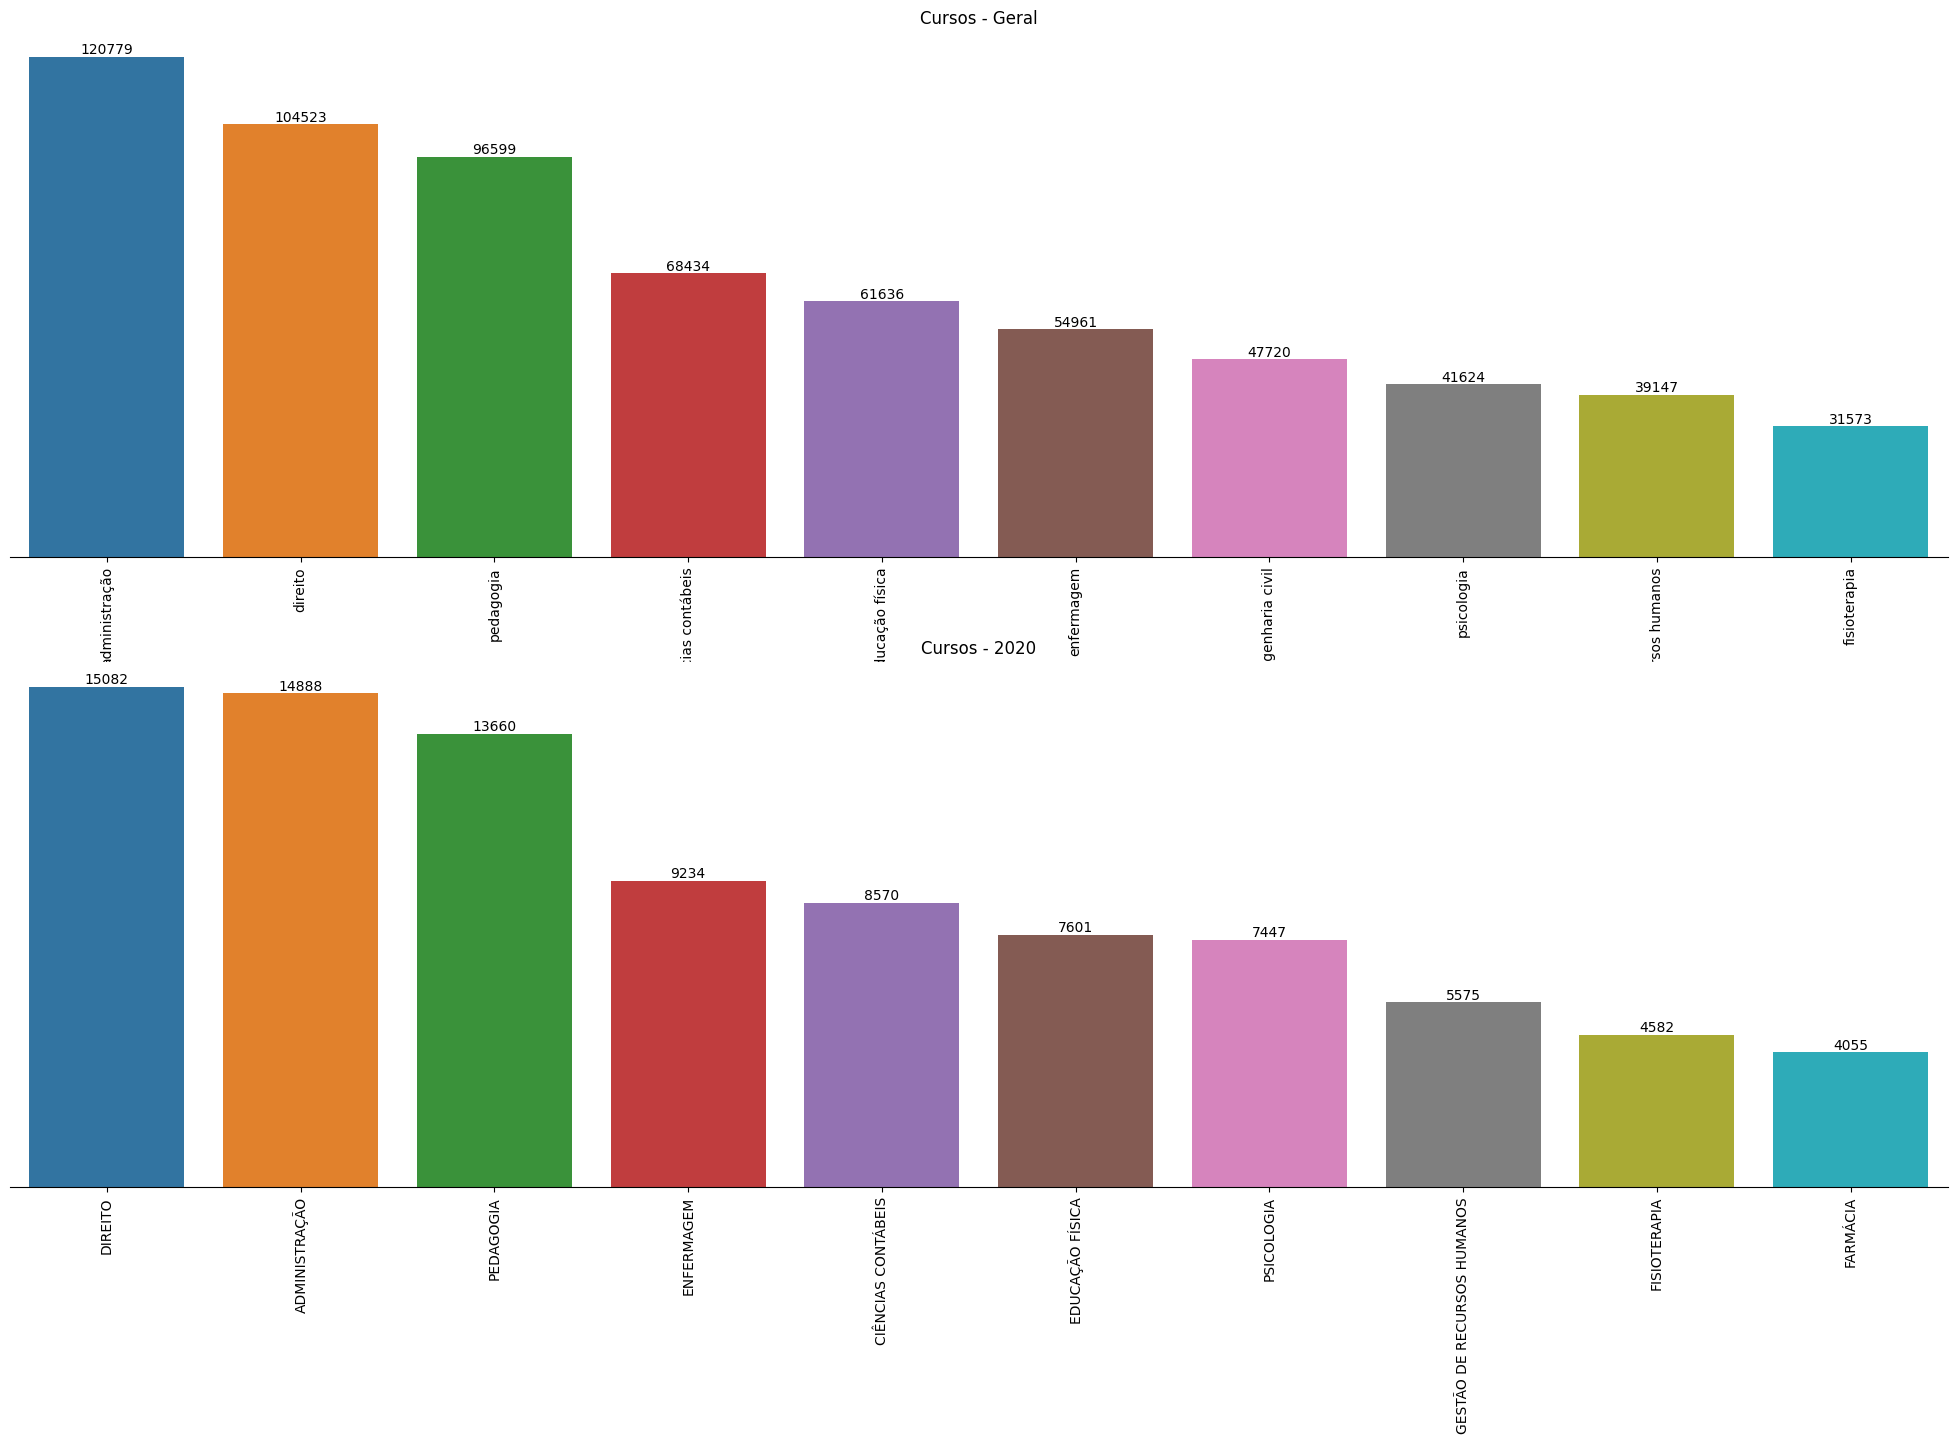

In [90]:
fig, axs = plt.subplots(2,1, figsize=(25, 15))

curso_top_10 = df_prouni['NOME_CURSO_BOLSA'].value_counts()[:10]
sns.barplot(ax=axs[0], x=curso_top_10.index, y=curso_top_10)
# Adiciona os valores no topo das colunas
for index2, value2 in enumerate(curso_top_10):
    axs[0].text(index2, value2 + 0.1, str(value2), ha='center', va='bottom')
axs[0].set_xticklabels(curso_top_10.index, rotation=90)
        # Remove os valores do eixo Y
axs[0].set(yticklabels=[], ylabel=None)
    # Remove os ticks do eixo Y
axs[0].tick_params(axis='y', which='both', left=False)
        # Remove as caixas delimitadoras
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].set_title('Cursos - Geral')

curso_top_10_2020 = df_2020['NOME_CURSO_BOLSA'].value_counts()[:10]
sns.barplot(ax=axs[1], x=curso_top_10_2020.index, y=curso_top_10_2020)
# Adiciona os valores no topo das colunas
for index2, value2 in enumerate(curso_top_10_2020):
    axs[1].text(index2, value2 + 0.1, str(value2), ha='center', va='bottom')
axs[1].set_xticklabels(curso_top_10_2020.index, rotation=90)
        # Remove os valores do eixo Y
axs[1].set(yticklabels=[], ylabel=None)
    # Remove os ticks do eixo Y
axs[1].tick_params(axis='y', which='both', left=False)
        # Remove as caixas delimitadoras
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].set_title('Cursos - 2020')
plt.show()

###Distribuição Ano a Ano e por UF

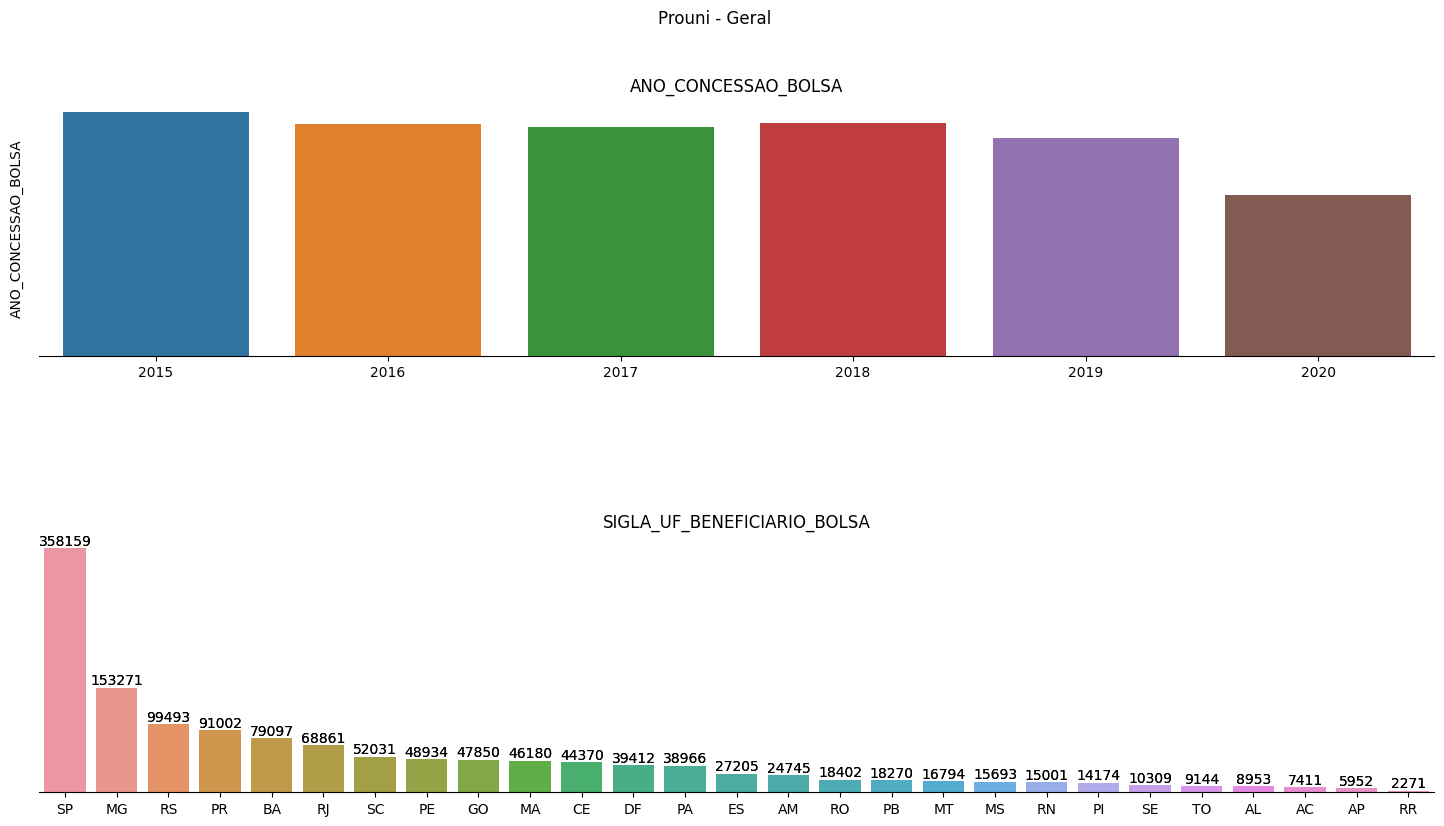

In [92]:
cols = ['ANO_CONCESSAO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA']

fig, axs = plt.subplots(2, 1, figsize=(18, 9))#, sharey=True)
fig.subplots_adjust(hspace = .7, wspace=.7)
fig.suptitle('Prouni - Geral')
        # Remove os valores do eixo Y
axs[0].set(yticklabels=[], ylabel=None)
    # Remove os ticks do eixo Y
axs[0].tick_params(axis='y', which='both', left=False)
        # Remove as caixas delimitadoras
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
for index2, value2 in enumerate(series_inter):
    axs[1].text(index2, value2 + 0.1, str(value2), ha='center', va='bottom')
axs = axs.ravel()

for i in range(len(cols)):
    series_inter = df_prouni[cols[i]].value_counts()
    sns.barplot(ax=axs[i], x=series_inter.index, y=series_inter)
    axs[i].set_title(cols[i])

for index2, value2 in enumerate(series_inter):
    axs[1].text(index2, value2 + 0.1, str(value2), ha='center', va='bottom')
        # Remove os valores do eixo Y
axs[1].set(yticklabels=[], ylabel=None)
    # Remove os ticks do eixo Y
axs[1].tick_params(axis='y', which='both', left=False)
        # Remove as caixas delimitadoras
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
plt.show()

####Diminuição de bolsas a partir de  2016
O maior número de bolsas consedidas foi em 2015, mas coincidentemente depois de 2016 (quando a presidente Dilma Rousseff sofreu impeachment) o valor tem diminuído lentamente. Não podemos confirmar uma correlação desses eventos, pois precisariamos de mais dados para comprovar essa tese. Porém é um ponto de atenção.

```
# Isto está formatado como código
```



In [93]:
print("Geral: {0:.0%} de estudantes do Estado de São Paulo.".format(series_inter['SP'] / series_inter.sum()))

Geral: 26% de estudantes do Estado de São Paulo.


#### SP concentra mais bolsas
São Paulo é o maior estado em população, então faz sentido que seja também o que tem o maior número de alunos participantes deste programa.

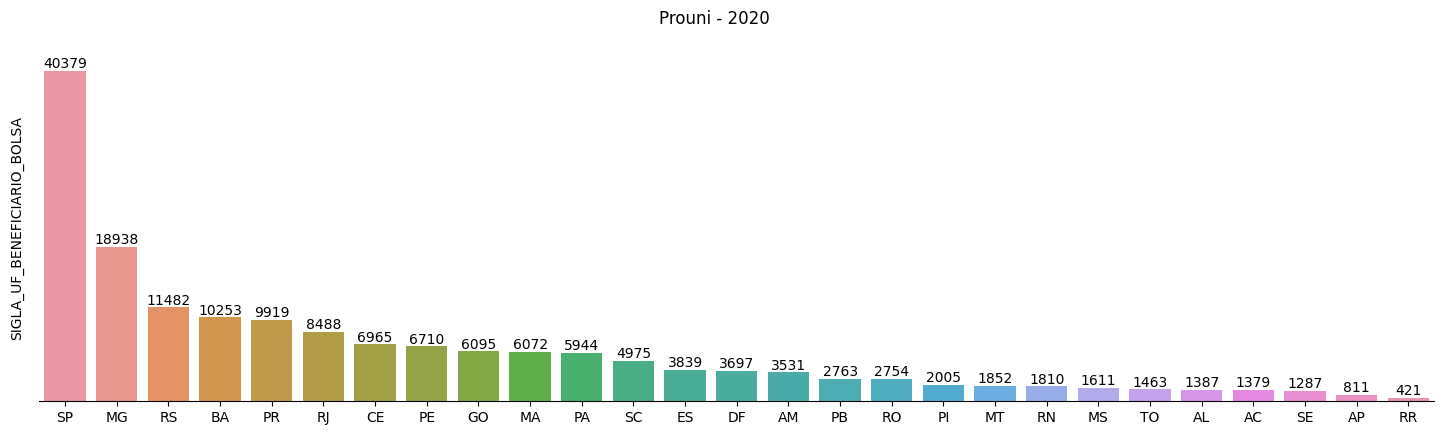

In [95]:
fig, axs = plt.subplots(1, 1, figsize=(18, 4.5))#, sharey=True)

fig.subplots_adjust(hspace = .7, wspace=.7)
fig.suptitle('Prouni - 2020')
for index2, value2 in enumerate(series_inter):
    axs.text(index2, value2 + 0.1, str(value2), ha='center', va='bottom')

series_inter = df_2020['SIGLA_UF_BENEFICIARIO_BOLSA'].value_counts()
        # Remove os valores do eixo Y
axs.set(yticklabels=[], ylabel=None)
    # Remove os ticks do eixo Y
axs.tick_params(axis='y', which='both', left=False)
        # Remove as caixas delimitadoras
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['left'].set_visible(False)

sns.barplot(ax=axs, x=series_inter.index, y=series_inter)
plt.show()

In [96]:
print("2020: {0:.0%} de alunos de São Paulo.".format(series_inter['SP'] / series_inter.sum()))

2020: 24% de alunos de São Paulo.


In [ ]:
!pip install mapclassify

In [ ]:
!pip install geoplot

In [97]:
import geopandas as gpd
import mapclassify
import geoplot

##1. Análise por gênero


In [98]:
df_prouni['DT_NASCIMENTO_BENEFICIARIO'] = pd.to_datetime(df_prouni['DT_NASCIMENTO_BENEFICIARIO'], format='%d/%m/%Y')

# Calculando a diferença entre o ano de concessão e o ano de nascimento
df_prouni['IDADE'] = df_prouni['ANO_CONCESSAO_BOLSA'] - df_prouni['DT_NASCIMENTO_BENEFICIARIO'].dt.year

# Extraindo o componente de ano da diferença calculada
df_prouni['IDADE'] = df_prouni['IDADE']#.astype(int)

<ipython-input-99-1ca7d0edb578>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_gen_idade.columns)


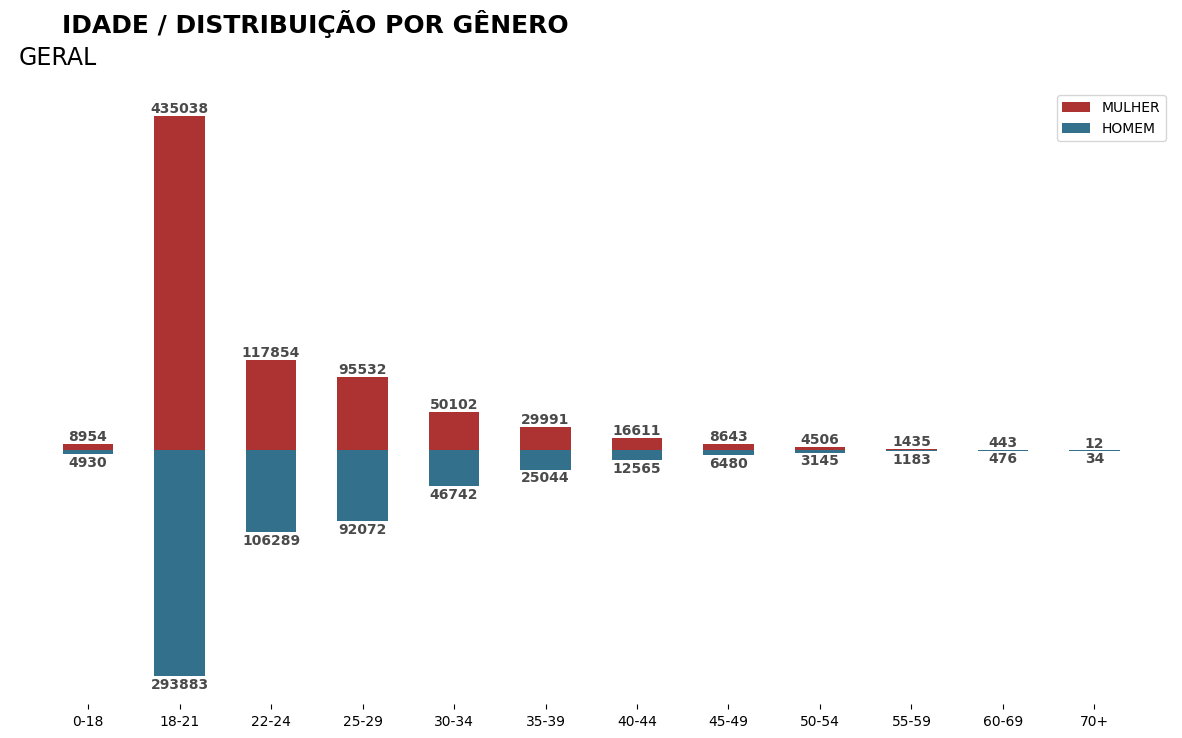

In [99]:
bins= [0,18,22,25,30,35,40,45,50,55,60,70,100]
labels = ['0-18','18-21','22-24','25-29','30-34',
          '35-39','40-44','45-49','50-54', '55-59',
          '60-69', '70+']

df_prouni['AgeGroup'] = pd.cut(df_prouni['IDADE'], bins=bins, labels=labels, right=False)

data_gen_idade = df_prouni.groupby(['SEXO_BENEFICIARIO_BOLSA'])['AgeGroup'].value_counts().unstack().sort_index()

man = -data_gen_idade.loc['M']
woman = data_gen_idade.loc['F']

fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.bar(woman.index, woman, width=0.55, color='#990000', alpha=0.8, label='MULHER')
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='HOMEM')
# ax.set_ylim(-1200, 3500)

for i in man.index:
    ax.annotate(f"{-man[i]}",
                   xy=(i, man[i] - 10000),
                   va = 'center', ha='center',fontweight='bold',
                   color='#4a4a4a')

for i in woman.index:
    ax.annotate(f"{woman[i]}",
                   xy=(i, woman[i] + 10000),
                   va = 'center', ha='center',fontweight='bold',
                   color='#4a4a4a')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_gen_idade.columns)
ax.set_yticks([])
ax.legend()
fig.text(0.16, 0.95, 'IDADE / DISTRIBUIÇÃO POR GÊNERO', fontsize=18, fontweight='bold')
fig.text(0.131, 0.91, 'GERAL', fontsize=17)
plt.show()

#### Distribuição de gênero - Top 10 Estados

In [100]:
# Obtém as 10 siglas de estados mais frequentes na coluna 'SIGLA_UF_BENEFICIARIO_BOLSA'
states_order = df_prouni['SIGLA_UF_BENEFICIARIO_BOLSA'].value_counts()[:10].index

# Seleciona as colunas 'SEXO_BENEFICIARIO_BOLSA' e 'SIGLA_UF_BENEFICIARIO_BOLSA' do DataFrame
# e realiza uma contagem do número de ocorrências para cada combinação de estado e sexo
data_gen_state = df_prouni[['SEXO_BENEFICIARIO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA']] \
                .groupby('SIGLA_UF_BENEFICIARIO_BOLSA')['SEXO_BENEFICIARIO_BOLSA'] \
                .value_counts().unstack().loc[states_order]

# Adiciona uma nova coluna 'sum', que representa a soma total de beneficiários para cada estado
data_gen_state['sum'] = data_gen_state.sum(axis=1)

# Calcula a razão entre o número de beneficiários masculinos (M) e femininos (F)
# para cada estado, normalizando pela soma total de beneficiários
data_gen_state_ratio = (data_gen_state.T / data_gen_state['sum']).T[['M', 'F']]


<ipython-input-101-fbde4adb0f67>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_gen_state_ratio.index[::], fontsize=11)


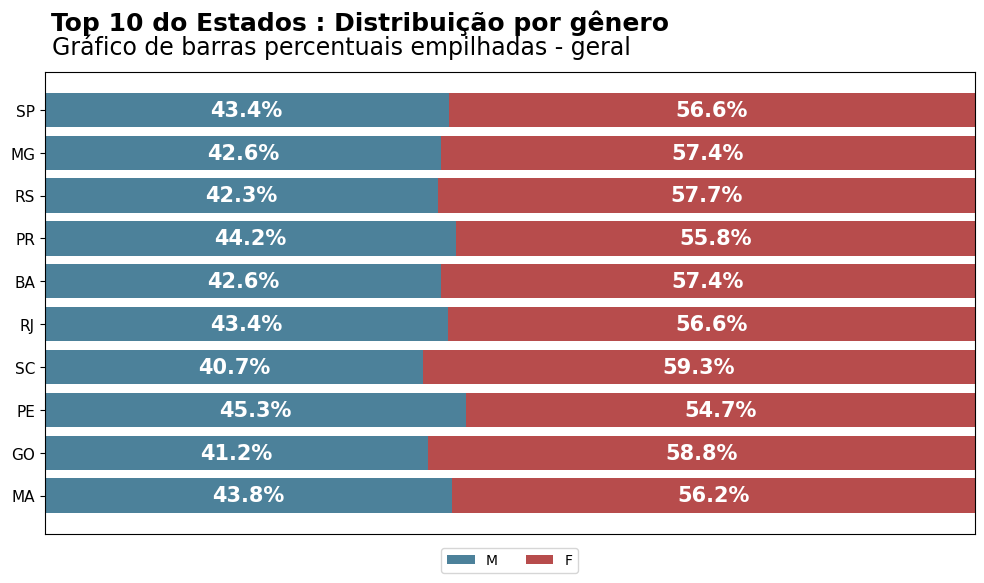

In [101]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(data_gen_state_ratio.index[::], data_gen_state_ratio['M'],
        color='#004c70', alpha=0.7, label='M')
ax.barh(data_gen_state_ratio.index[::], data_gen_state_ratio['F'], left=data_gen_state_ratio['M'],
        color='#990000', alpha=0.7, label='F')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_gen_state_ratio.index[::], fontsize=11)

# porcentagem masculina
for i in data_gen_state_ratio.index:
    ax.annotate(f"{data_gen_state_ratio['M'][i]*100:.3}%",
                   xy=(data_gen_state_ratio['M'][i]/2, i),
                   va = 'center', ha='center',fontsize=15, fontweight='bold',
                   color='white')
# porcentagem femenina
for i in data_gen_state_ratio.index:
    ax.annotate(f"{data_gen_state_ratio['F'][i]*100:.3}%",
                   xy=(data_gen_state_ratio['M'][i]+data_gen_state_ratio['F'][i]/2, i),
                   va = 'center', ha='center',fontsize=15, fontweight='bold',
                   color='white')


fig.text(0.13, 0.95, 'Top 10 do Estados : Distribuição por gênero', fontsize=18, fontweight='bold')
fig.text(0.131, 0.91, 'Gráfico de barras percentuais empilhadas - geral', fontsize=17)


ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))
plt.gca().invert_yaxis()
plt.show()

In [102]:
# Obtém os 10 cursos mais frequentes na coluna 'NOME_CURSO_BOLSA'
curso_top_10 = df_prouni['NOME_CURSO_BOLSA'].value_counts()[:10].index

# Seleciona as colunas 'SEXO_BENEFICIARIO_BOLSA' e 'NOME_CURSO_BOLSA' do DataFrame
# e realiza uma contagem do número de ocorrências para cada combinação de curso e sexo
data_gen_course = df_prouni[['SEXO_BENEFICIARIO_BOLSA', 'NOME_CURSO_BOLSA']] \
                .groupby('NOME_CURSO_BOLSA')['SEXO_BENEFICIARIO_BOLSA'] \
                .value_counts().unstack().loc[curso_top_10]

# Adiciona uma nova coluna 'sum', que representa a soma total de beneficiários para cada curso
data_gen_course['sum'] = data_gen_course.sum(axis=1)

# Calcula a razão entre o número de beneficiários masculinos (M) e femininos (F)
# para cada curso, normalizando pela soma total de beneficiários
data_gen_course_ratio = (data_gen_course.T / data_gen_course['sum']).T[['M', 'F']]


<ipython-input-103-d8f4324a4553>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_gen_course_ratio.index[::], fontsize=11)


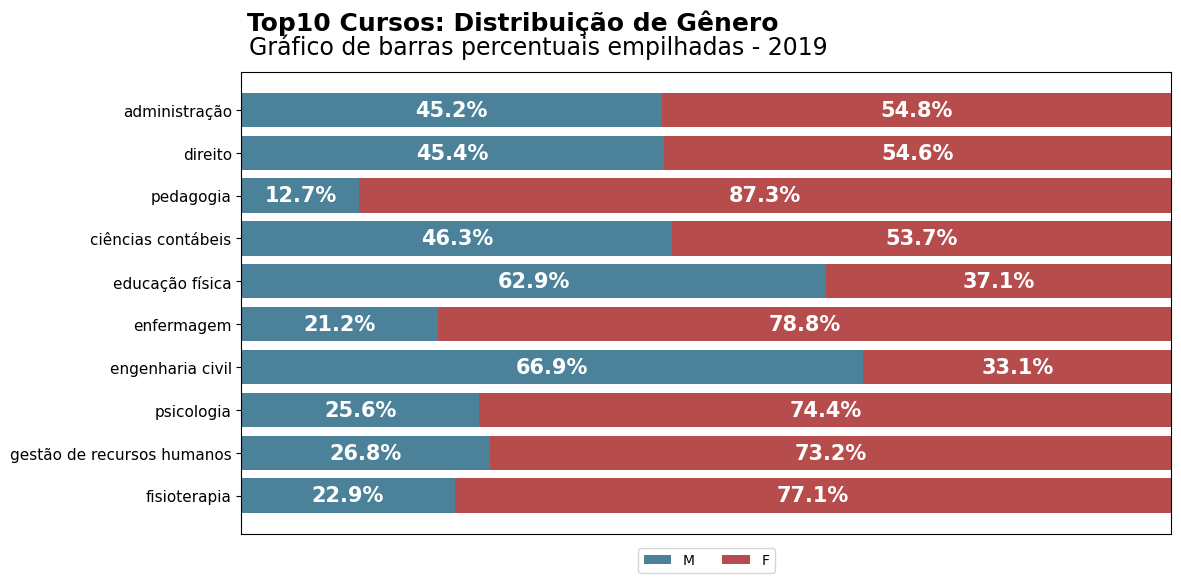

In [103]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(data_gen_course_ratio.index[::], data_gen_course_ratio['M'],
        color='#004c70', alpha=0.7, label='M')
ax.barh(data_gen_course_ratio.index[::], data_gen_course_ratio['F'], left=data_gen_course_ratio['M'],
        color='#990000', alpha=0.7, label='F')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_gen_course_ratio.index[::], fontsize=11)

# porcentagem masculina
for i in data_gen_course_ratio.index:
    ax.annotate(f"{data_gen_course_ratio['M'][i]*100:.3}%",
                   xy=(data_gen_course_ratio['M'][i]/2, i),
                   va = 'center', ha='center',fontsize=15, fontweight='bold',
                   color='white')
# porcentagem feminina
for i in data_gen_course_ratio.index:
    ax.annotate(f"{data_gen_course_ratio['F'][i]*100:.3}%",
                   xy=(data_gen_course_ratio['M'][i]+data_gen_course_ratio['F'][i]/2, i),
                   va = 'center', ha='center',fontsize=15, fontweight='bold',
                   color='white')


fig.text(0.13, 0.95, 'Top10 Cursos: Distribuição de Gênero', fontsize=18, fontweight='bold')
fig.text(0.131, 0.91, 'Gráfico de barras percentuais empilhadas - 2019', fontsize=17)


ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))
plt.gca().invert_yaxis()
plt.show()

##2. Análise por raça

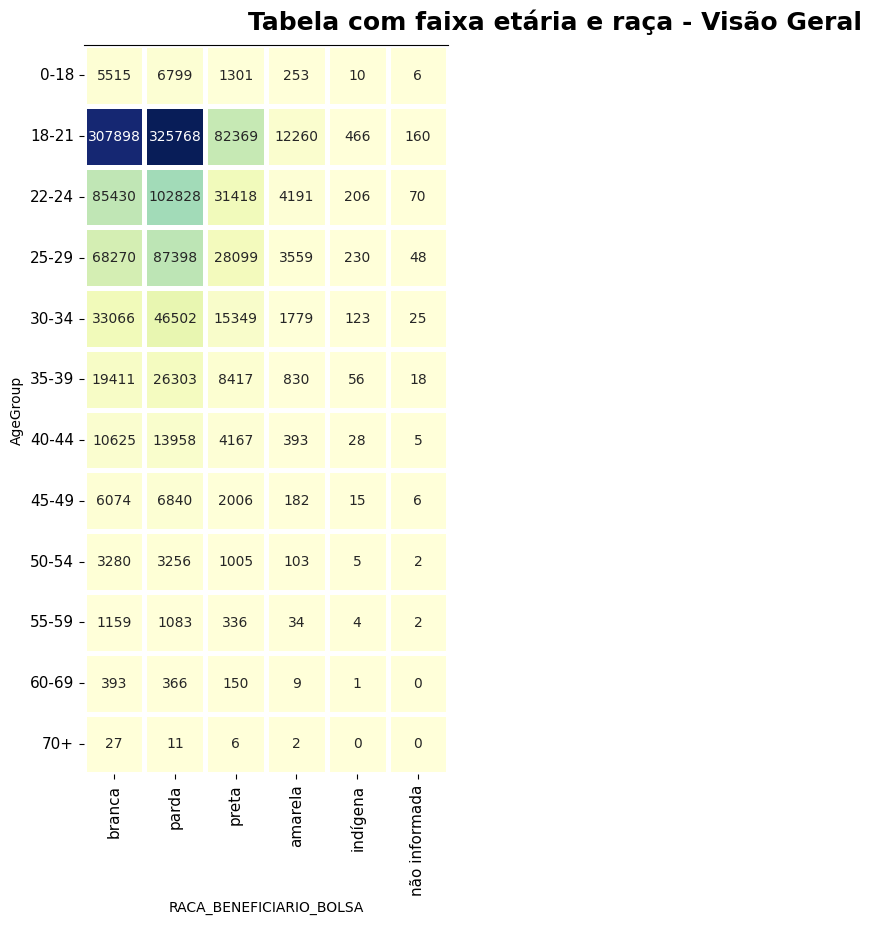

In [104]:
race_order = ['branca', 'parda', 'preta', 'amarela', 'indígena', 'não informada']
df_prouni['count'] = 1
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
sns.heatmap(pd.pivot_table(df_prouni, values='count', index=['AgeGroup'], columns=['RACA_BENEFICIARIO_BOLSA'], aggfunc=np.sum)[race_order],
            cmap="YlGnBu",
            square=True,
            linewidth=2.5,
            cbar=False,
            ax=ax,
            annot=True,
            fmt="d"
           )

ax.spines['top'].set_visible(True)

fig.text(0.48, 1, 'Tabela com faixa etária e raça - Visão Geral', fontweight='bold', fontsize=18)

ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=11)

plt.tight_layout()
plt.show()

# Conclusão

Através da análise e visualização dos dados referentes ao período de 2015 a 2020, podemos destacar algumas conclusões significativas:

- Houve uma queda no número de bolsas concedidas.
- Predominam bolsas de ensino integral e presencial.
- A maior parte dos beneficiários é do sexo feminino e pertence à raça parda.
- A região Sudeste lidera em termos de quantidade de bolsas.
- Os cursos mais contemplados com bolsas são Administração, Direito e Pedagogia.
- A grande maioria das bolsas está destinada ao estado de São Paulo.
- A maioria dos contemplados com a bolsa possui a faixa etária de 18 à 21 anos.
- A maioria dos contemplados com a bolsa para o curso de Engenharia Civil é do sexo masculino e a maioria do curso de Pedagogia, Enfermagem, Psicologia é do sexo feminino.

Reconhecimentos e Direitos Autorais

@autor: Bruno Coelho e Gustavo Mendes[Seus Nomes]

@contato: bruno-coelho@hotmail.com e gustavo.queiroz@discente.ufma.br

@data última versão: 19/12/2023

@versão: 1.0

@Agradecimentos: Universidade Federal do Maranhão (UFMA), Professor Doutor Thales Levi Azevedo Valente, e colegas de curso.

@Copyright/License

Este material é resultado de um trabalho acadêmico para a disciplina MINERAÇÃO DE DADOS APLICADA À ENGENHARIA, sobre a orientação do professor Dr. THALES LEVI AZEVEDO VALENTE, semestre letivo 2023.2, curso Engenharia da Computação, na Universidade Federal do Maranhão (UFMA). Todo o material sob esta licença é software livre: pode ser usado para fins acadêmicos e comerciais sem nenhum custo. Não há papelada, nem royalties, nem restrições de "copyleft" do tipo GNU. Ele é licenciado sob os termos da licença MIT reproduzida abaixo e, portanto, é compatível com GPL e também se qualifica como software de código aberto. É de domínio público. Os detalhes legais estão abaixo. O espírito desta licença é que você é livre para usar este material para qualquer finalidade, sem nenhum custo. O único requisito é que, se você usá-los, nos dê crédito.

Copyright © 2023 Educational Material